#APPAREL_SEGMENTATION_Detectron2_With_Mask_R_CNN_on_COCO_and_Deepfashion2



In [16]:
import sys, os, distutils.core

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
ROOT_DIRECTORY = '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2'
MODEL_DIR = '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/models'
DATA_DIRECTORY = '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/deepfashion2_dataset'
INPUT_DIR = '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/data/input'
OUTPUT_DIR = '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/data/output'

if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

if not os.path.exists(INPUT_DIR):
    os.makedirs(INPUT_DIR)

In [ ]:
# !unzip $DATA_DIRECTORY/drive-download-20250304T082329Z-003.zip -d $DATA_DIRECTORY

In [ ]:
# !unzip -P "2019Deepfashion2**" $DATA_DIRECTORY/validation.zip -d $DATA_DIRECTORY

In [ ]:
# !unzip -P "2019Deepfashion2**" $DATA_DIRECTORY/json_for_validation.zip -d $DATA_DIRECTORY

In [ ]:
# cp $DATA_DIRECTORY/test-002.zip /content/deepfashion2_data

In [ ]:
# !unzip -P "2019Deepfashion2**" $DATA_DIRECTORY/test-002.zip -d $DATA_DIRECTORY

In [ ]:
# pwd

In [ ]:
# cp $DATA_DIRECTORY/train-001.zip /content/deepfashion2_data

In [ ]:
# !unzip -P "2019Deepfashion2**" $DATA_DIRECTORY/train-001.zip -d $DATA_DIRECTORY

In [19]:
!pip install torch torchvision pixellib opencv-python numpy scipy

In [ ]:
# !git clone 'https://github.com/facebookresearch/detectron2.git'

In [ ]:
# !cd detectron2

In [20]:
dist = distutils.core.run_setup(os.path.join(MODEL_DIR,"detectron2/setup.py"))
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath(os.path.join(MODEL_DIR,"detectron2")))

Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [21]:
!pip install -e $MODEL_DIR/detectron2

Obtaining file:///content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/models/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [ ]:
# !git clone https://github.com/switchablenorms/DeepFashion2.git

fatal: destination path 'DeepFashion2' already exists and is not an empty directory.


In [22]:
!git clone https://github.com/matterport/Mask_RCNN.git $MODEL_DIR/Mask_RCNN

Cloning into '/content/drive/MyDrive/498/WIPDocuments/Code/UseCase2/models/Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956 (from 1)
Receiving objects: 100% (956/956), 137.67 MiB | 26.38 MiB/s, done.
Resolving deltas: 100% (558/558), done.
Updating files: 100% (76/76), done.


In [23]:
!pip install -r $MODEL_DIR/Mask_RCNN/requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 9.2 MB/s eta 0:00:00


In [24]:
!pip install $MODEL_DIR/Mask_RCNN


Processing ./drive/MyDrive/498/WIPDocuments/Code/UseCase2/models/Mask_RCNN
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56920 sha256=a1edeb202791502f995fb31b0c08b3ea97c3eeb75190153cd5e7bb247af341e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-_bcywtt4/wheels/e1/85/1b/ef435b9fc10f2c44cb93a582fb54189b21ee43e11198d68436
Successfully built mask-rcnn


In [25]:
!cp -p $MODEL_DIR/Mask_RCNN/mrcnn/model.py /usr/local/lib/python3.11/dist-packages/mrcnn/model.py

In [26]:
try:
    import mrcnn
    print("Deepfashion2 Mask R-CNN is installed.")
except ImportError:
    print("Deepfashion2 Mask R-CNN is NOT installed.")


Deepfashion2 Mask R-CNN is installed.


In [27]:
pwd

'/content'

In [ ]:
# mkdir deepfashion2_data

In [ ]:
# cd deepfashion2_data


In [ ]:
# !unzip $DATA_DIRECTORY/drive-download-20250304T082329Z-003.zip

In [ ]:
# !unzip -P "2019Deepfashion2**" /content/deepfashion2_data/validation.zip

In [ ]:
# !unzip -P "2019Deepfashion2**" /content/deepfashion2_data/json_for_validation.zip

In [ ]:
# cp $DATA_DIRECTORY/test-002.zip /content/deepfashion2_data

In [ ]:
# !unzip -P "2019Deepfashion2**" /content/deepfashion2_data/test-002.zip

In [ ]:
# pwd

In [ ]:
# cp $DATA_DIRECTORY/train-001.zip /content/deepfashion2_data

In [ ]:
# !unzip -P "2019Deepfashion2**" /content/deepfashion2_data/train-001.zip

In [28]:
cd /content/detectron2

[Errno 2] No such file or directory: '/content/detectron2'
/content


In [29]:
pwd

'/content'

In [ ]:
# !pip install -U detectron2


In [30]:
import cv2
import torch

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
# from PIL import Image
# import numpy as np
# import json

# dataset = {
#     "info": {},
#     "licenses": [],
#     "images": [],
#     "annotations": [],
#     "categories": []
# }

# lst_name = ['short_sleeved_shirt', 'long_sleeved_shirt', 'short_sleeved_outwear', 'long_sleeved_outwear',
#             'vest', 'sling', 'shorts', 'trousers', 'skirt', 'short_sleeved_dress',
#             'long_sleeved_dress', 'vest_dress', 'sling_dress']

# for idx, e  in enumerate(lst_name):
#     dataset['categories'].append({
#         'id': idx + 1,
#         'name': e,
#         'supercategory': "clothes",
#         'keypoints': ['%i' % (i) for i in range(1, 295)],
#         'skeleton': []
#     })

# num_images = 32153 #191961
# sub_index = 0  # the index of ground truth instance
# for num in range(1, num_images + 1):
#     json_name = os.path.join(DATA_DIRECTORY,'train/annos/') + str(num).zfill(6) + '.json'
#     image_name = os.path.join(DATA_DIRECTORY,'train/image/') + str(num).zfill(6) + '.jpg'

#     if (num >= 0):
#         imag = Image.open(image_name)
#         width, height = imag.size
#         with open(json_name, 'r') as f:
#             temp = json.loads(f.read())
#             pair_id = temp['pair_id']

#             dataset['images'].append({
#                 'coco_url': '',
#                 'date_captured': '',
#                 'file_name': str(num).zfill(6) + '.jpg',
#                 'flickr_url': '',
#                 'id': num,
#                 'license': 0,
#                 'width': width,
#                 'height': height
#             })
#             for i in temp:
#                 if i == 'source' or i == 'pair_id':
#                     continue
#                 else:
#                     points = np.zeros(294 * 3)
#                     sub_index = sub_index + 1
#                     box = temp[i]['bounding_box']
#                     w = box[2] - box[0]
#                     h = box[3] - box[1]
#                     x_1 = box[0]
#                     y_1 = box[1]
#                     bbox = [x_1, y_1, w, h]
#                     cat = temp[i]['category_id']
#                     style = temp[i]['style']
#                     seg = temp[i]['segmentation']
#                     landmarks = temp[i]['landmarks']

#                     points_x = landmarks[0::3]
#                     points_y = landmarks[1::3]
#                     points_v = landmarks[2::3]
#                     points_x = np.array(points_x)
#                     points_y = np.array(points_y)
#                     points_v = np.array(points_v)
#                     case = [0, 25, 58, 89, 128, 143, 158, 168, 182, 190, 219, 256, 275, 294]
#                     idx_i, idx_j = case[cat - 1], case[cat]

#                     for n in range(idx_i, idx_j):
#                         points[3 * n] = points_x[n - idx_i]
#                         points[3 * n + 1] = points_y[n - idx_i]
#                         points[3 * n + 2] = points_v[n - idx_i]

#                     num_points = len(np.where(points_v > 0)[0])

#                     dataset['annotations'].append({
#                         'area': w * h,
#                         'bbox': bbox,
#                         'category_id': cat,
#                         'id': sub_index,
#                         'pair_id': pair_id,
#                         'image_id': num,
#                         'iscrowd': 0,
#                         'style': style,
#                         'num_keypoints': num_points,
#                         'keypoints': points.tolist(),
#                         'segmentation': seg,
#                     })

# json_name = os.path.join(DATA_DIRECTORY,'train/deepfashion2_train.json')
# with open(json_name, 'w') as f:
#     json.dump(dataset, f)

In [ ]:
# !cp /content/deepfashion2_data/train/deepfashion2_train.json $DATA_DIRECTORY/train

In [ ]:
# !cp $DATA_DIRECTORY/train/deepfashion2_train.json /content/deepfashion2_data/train/

cp: cannot create regular file '/content/deepfashion2_data/train/': No such file or directory


#We will use validation dataset to train as its smaller. Here we create a combiner JSON for validation dataset

In [ ]:
from PIL import Image
import numpy as np
import json

dataset = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}

lst_name = ['short_sleeved_shirt', 'long_sleeved_shirt', 'short_sleeved_outwear', 'long_sleeved_outwear',
            'vest', 'sling', 'shorts', 'trousers', 'skirt', 'short_sleeved_dress',
            'long_sleeved_dress', 'vest_dress', 'sling_dress']

for idx, e  in enumerate(lst_name):
    dataset['categories'].append({
        'id': idx + 1,
        'name': e,
        'supercategory': "clothes",
        'keypoints': ['%i' % (i) for i in range(1, 295)],
        'skeleton': []
    })

num_images = 32153 #191961
sub_index = 0  # the index of ground truth instance
for num in range(1, num_images + 1):
    json_name = os.path.join(DATA_DIRECTORY,'validation/annos/') + str(num).zfill(6) + '.json'
    image_name = os.path.join(DATA_DIRECTORY,'validation/image/') + str(num).zfill(6) + '.jpg'

    if (num >= 0):
        imag = Image.open(image_name)
        width, height = imag.size
        with open(json_name, 'r') as f:
            temp = json.loads(f.read())
            pair_id = temp['pair_id']

            dataset['images'].append({
                'coco_url': '',
                'date_captured': '',
                'file_name': str(num).zfill(6) + '.jpg',
                'flickr_url': '',
                'id': num,
                'license': 0,
                'width': width,
                'height': height
            })
            for i in temp:
                if i == 'source' or i == 'pair_id':
                    continue
                else:
                    points = np.zeros(294 * 3)
                    sub_index = sub_index + 1
                    box = temp[i]['bounding_box']
                    w = box[2] - box[0]
                    h = box[3] - box[1]
                    x_1 = box[0]
                    y_1 = box[1]
                    bbox = [x_1, y_1, w, h]
                    cat = temp[i]['category_id']
                    style = temp[i]['style']
                    seg = temp[i]['segmentation']
                    landmarks = temp[i]['landmarks']

                    points_x = landmarks[0::3]
                    points_y = landmarks[1::3]
                    points_v = landmarks[2::3]
                    points_x = np.array(points_x)
                    points_y = np.array(points_y)
                    points_v = np.array(points_v)
                    case = [0, 25, 58, 89, 128, 143, 158, 168, 182, 190, 219, 256, 275, 294]
                    idx_i, idx_j = case[cat - 1], case[cat]

                    for n in range(idx_i, idx_j):
                        points[3 * n] = points_x[n - idx_i]
                        points[3 * n + 1] = points_y[n - idx_i]
                        points[3 * n + 2] = points_v[n - idx_i]

                    num_points = len(np.where(points_v > 0)[0])

                    dataset['annotations'].append({
                        'area': w * h,
                        'bbox': bbox,
                        'category_id': cat,
                        'id': sub_index,
                        'pair_id': pair_id,
                        'image_id': num,
                        'iscrowd': 0,
                        'style': style,
                        'num_keypoints': num_points,
                        'keypoints': points.tolist(),
                        'segmentation': seg,
                    })

json_name = os.path.join(DATA_DIRECTORY,'validation/deepfashion2_validation.json')
with open(json_name, 'w') as f:
    json.dump(dataset, f)

In [ ]:
# !cp /content/deepfashion2_data/validation/deepfashion2_validation.json $DATA_DIRECTORY/validation

In [ ]:
# !cp $DATA_DIRECTORY/validation/deepfashion2_validation.json /content/deepfashion2_data/validation/

cp: cannot create regular file '/content/deepfashion2_data/validation/': No such file or directory


In [ ]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import os
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Mask R-CNN (COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml)
Task: Instance Segmentation
Output: Bounding boxes + Pixel-wise masks
Backbone: ResNeXt-101 (32x8d) with FPN (a more powerful architecture)
Pretrained Dataset: COCO
Use Case: This model is better if you need precise segmentation of objects, which is crucial for tasks like Virtual Try-On (VTO).

In [ ]:
from detectron2.data.datasets import register_coco_instances
# register_coco_instances("deepfashion_train_2", {}, os.path.join(DATA_DIRECTORY,'train/deepfashion2_train.json'), os.path.join(DATA_DIRECTORY,'train/image'))
register_coco_instances("deepfashion2_val_2", {}, os.path.join(DATA_DIRECTORY,'validation/deepfashion2_validation.json'), os.path.join(DATA_DIRECTORY,'validation/image'))

In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("deepfashion2_val_2",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo

# cfg.SOLVER.IMS_PER_BATCH = 8
# cfg.SOLVER.BASE_LR = 0.0001
# cfg.SOLVER.WARMUP_ITERS = 1000
# cfg.SOLVER.MAX_ITER = 4000
# cfg.SOLVER.STEPS = (2000, 3000)
# cfg.SOLVER.GAMMA = 0.1
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

# cfg.TEST.EVAL_PERIOD = 500

cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.075
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 2000
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

cfg.TEST.EVAL_PERIOD = 500

patience = 100
tolerance = 0.01

In [ ]:
from detectron2.engine.hooks import HookBase

class EarlyStoppingHook(HookBase):
    def __init__(self, patience=100, tolerance=0.0):
        super().__init__()
        self.patience = patience
        self.tolerance = tolerance
        self.best_loss = float('inf')
        self.wait = 0

    def after_step(self):
        # Get the current training loss
        current_loss = self.trainer.storage.history("total_loss").latest()

        if current_loss < self.best_loss - self.tolerance:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"Early stopping triggered after {self.wait} iterations without loss improvement.")
                self.trainer.should_stop = True

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
# trainer.register_hooks([EarlyStoppingHook(patience=100)])  # Register the hook
trainer.resume_or_load(resume=False)
trainer.train()

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

In [ ]:
evaluator = COCOEvaluator("deepfashion2_val_2", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "deepfashion2_val_2")
inference_on_dataset(trainer.model, val_loader, evaluator)


In [ ]:
from detectron2.checkpoint import DetectionCheckpointer

# ... (Your training code) ...

checkpointer = DetectionCheckpointer(trainer.model, save_dir=MODEL_DIR)
checkpointer.save("Detectron2_mask_rcnn_X_101_32x8d_FPN_3x_on_DeepFashion2")  # Save a checkpoint with a custom name

In [ ]:
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, MODEL_DIR + "/Detectron2_mask_rcnn_X_101_32x8d_FPN_3x_on_DeepFashion2_LR075_BATCH8.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
cfg.DATASETS.TEST = ("deepfashion2_val_2", )
predictor = DefaultPredictor(cfg)

[03/08 10:59:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/models/Detectron2_mask_rcnn_X_101_32x8d_FPN_3x_on_DeepFashion2_LR075_BATCH8.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [ ]:
import requests

url = "https://img-lcwaikiki.mncdn.com/mnresize/1024/-//productimages/20201/1/3945185/l_20201-0sg016z8-cs8_a.jpg"
save_path = os.path.join(INPUT_DIR,"testImage2.jpg")

response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(save_path, "wb") as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)
    print("Download complete!")
else:
    print("Failed to download image.")

Download complete!


In [ ]:
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
sample_metadata = MetadataCatalog.get("deepfashion2_val_2")
dataset_dicts = DatasetCatalog.get("deepfashion2_val_2")

[03/08 11:00:21 d2.data.datasets.coco]: Loading /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/deepfashion2_dataset/validation/deepfashion2_validation.json takes 24.18 seconds.
[03/08 11:00:21 d2.data.datasets.coco]: Loaded 32153 images in COCO format from /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/deepfashion2_dataset/validation/deepfashion2_validation.json


In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread(save_path)
outputs = predictor(im)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


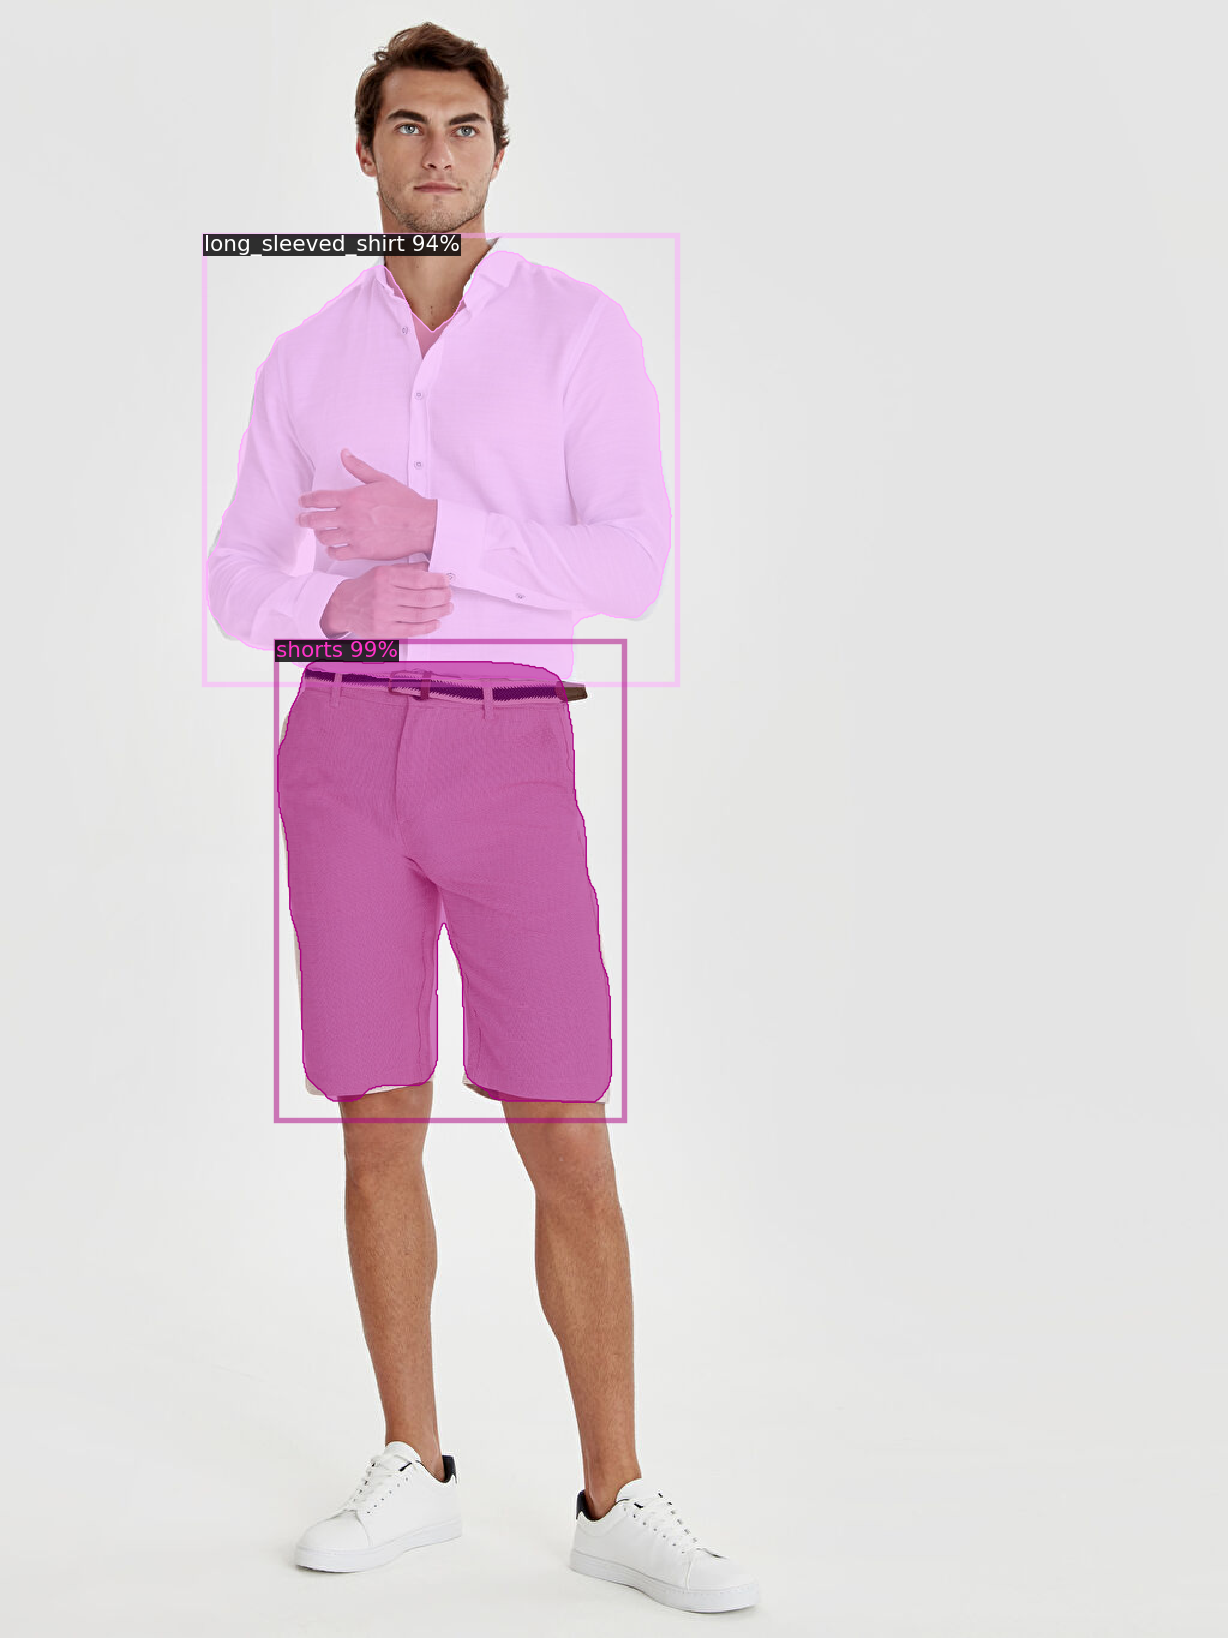

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

# Do this for the same image on which we are doing Body Pose

1: Short sleeve top
2: Long sleeve top
3: Short sleeve outwear
4: Long sleeve outwear
5: Vest
6: Suspenders
7: Shorts
8: Trousers
9: Skirt
10: Short sleeve dress
11: Long sleeve dress
12: Vest dress
13: Suspenders dress

In [ ]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread(save_path)
outputs = predictor(im)

In [ ]:
# from detectron2.utils.visualizer import ColorMode
# person_image = INPUT_DIR + "/person_image11.jpg"
# im = cv2.imread(person_image)
# outputs = predictor(im)
# v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(v.get_image()[:, :, ::-1])

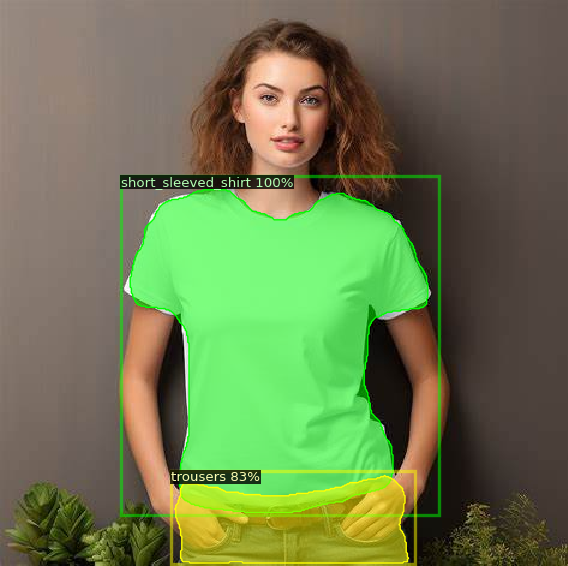

First 5 masks: [[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
First 10 classes: [0 7]
Apparel masks saved to: /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/Data/output/appsegmask
Apparel mask for class 0 saved as /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/Data/output/appsegmask/mask_0.png
Apparel masks saved to: /content/drive/MyDrive/498/WIPDocuments/Code/UseCase2_Try2/Data/output/appsegmask
Apparel mask for class 1 saved as /content/drive/MyDrive/498/WIPDocuments/Code

In [ ]:
person_image = INPUT_DIR + "/person_image1.jpg"
im = cv2.imread(person_image)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

# Extract masks and classes
masks = outputs["instances"].pred_masks.cpu().numpy()
classes = outputs["instances"].pred_classes.cpu().numpy()

print("First 5 masks:", masks[:5])  # Print the first 5 masks
print("First 10 classes:", classes[:10])  # Print the first 10 classes

# Assuming your apparel classes are 1, 2, 3, ... (check your dataset labels)
# apparel_indices = [i for i, class_id in enumerate(classes) if class_id in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
apparel_indices = [i for i, class_id in enumerate(classes) if class_id >= 0]
# print(class_id)
# print(apparel_indices)
# Get apparel masks
apparel_masks = masks[apparel_indices]

# Create the output directory if it doesn't exist
appsegmask_dir = os.path.join(OUTPUT_DIR, "appsegmask")
os.makedirs(appsegmask_dir, exist_ok=True)

# Save each apparel mask as a separate image file
for i, mask in enumerate(apparel_masks):
    # Convert the boolean mask to an 8-bit grayscale image
    mask_image = (mask * 255).astype(np.uint8)

    # Define the output file path
    output_path = os.path.join(appsegmask_dir, f"mask_{i}.png")

    # Save the mask image
    cv2.imwrite(output_path, mask_image)
    print(f"Apparel mask for class {i} saved as {os.path.join(OUTPUT_DIR, 'appsegmask', f'mask_{i}.png')}")

# apparel_masks now contains a list of boolean numpy arrays,
# where each array represents a mask for an apparel item.